In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import imutils
from imutils import face_utils
import dlib

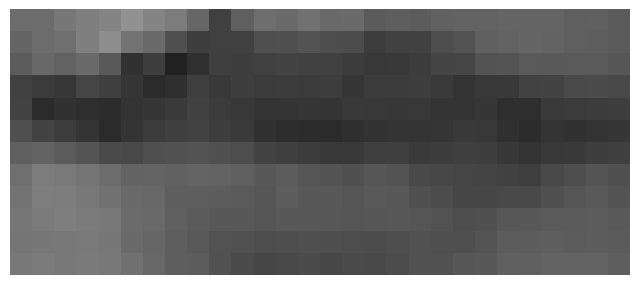

In [4]:
def lips_extractor(img):

    predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    bbox = dlib.rectangle(0, 0, gray.shape[1], gray.shape[0])

    face_landmarks = predictor(gray, bbox)
    face_landmarks = face_utils.shape_to_np(face_landmarks)

    for (region,(i,j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():
        if region=='mouth':
            for (x, y) in face_landmarks[i:j]:
                (x, y, w, h) = cv2.boundingRect(np.array([face_landmarks[i:j]]))
                lip_image = gray[y:y + h, x:x + w]

    if len(lip_image) == 0:
        print("No lips detected.")
        return None
    else:
        return lip_image

# Test lips extractor
lips_image = lips_extractor('Dataset\F07\phrases\\02\\01\color_002.jpg')
if lips_image is None:
    print("Error: No cropped image provided.")
else:
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(lips_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

In [ ]:
for f in os.listdir('dataset/dataset'):
    f_path = os.path.join('dataset/dataset', f)
    if os.path.isdir(f_path):
        for l in os.listdir(f_path):
            l_path = os.path.join(f_path, l)
            if os.path.isdir(l_path):
                for w in os.listdir(l_path):
                    w_path = os.path.join(l_path, w)
                    if os.path.isdir(w_path):
                        for p in os.listdir(w_path):
                            p_path = os.path.join(w_path, p)
                            if os.path.isdir(p_path):
                                for fname in os.listdir(p_path):
                                    if not os.path.isdir(fname):
                                        image_path = os.path.join(p_path, fname)
                                        cropped_lip = lips_extractor(image_path)
                                        if cropped_lip is not None:
                                            cv2.imwrite(image_path, cropped_lip)